# **Image to text**

**Import libraries**

In [1]:
import easyocr
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import numpy as np

**original image**

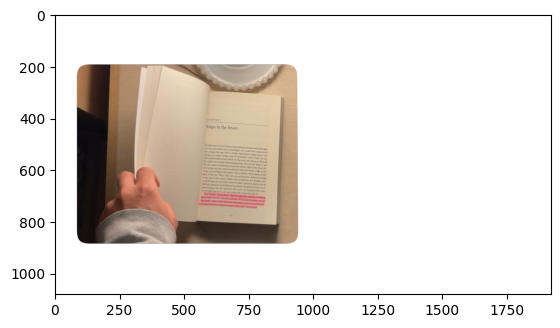

In [2]:
image_url = 'D:\MyProjects\Projects\img-to-txt-to-exp\input_images\Alice_In_Wonderland.png'
image_org = Image.open(image_url)
image_org = np.array(image_org)
plt.imshow(image_org)

In [3]:
read = easyocr.Reader(['en'])
res_org  = read.readtext(image_org)
res_org

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[586, 404], [640, 404], [640, 412], [586, 412]],
  'CHAPTRL €',
  0.17521278236004187),
 ([[584, 426], [711, 426], [711, 451], [584, 451]],
  'Maps in the Brain',
  0.8347162180570697),
 ([[626, 504], [658, 504], [658, 512], [626, 512]],
  'RoFan R',
  0.007350741744367691),
 ([[658, 503], [705, 503], [705, 517], [658, 517]],
  'deduce Uut',
  0.20253537074793074),
 ([[591, 513], [647, 513], [647, 526], [591, 526]],
  'the Dcucodicx',
  0.057165688007356434),
 ([[702, 507], [769, 507], [769, 522], [702, 522]],
  "'felcrence (rama",
  0.20043855647846873),
 ([[677, 519], [719, 519], [719, 533], [677, 533]],
  'hinducht',
  0.43653577235583324),
 ([[731, 523], [775, 523], [775, 535], [731, 535]],
  'Qu huve',
  0.09063427015403927),
 ([[778, 528], [822, 528], [822, 536], [778, 536]],
  'uUno',
  0.02298133261501789),
 ([[680, 534], [706, 534], [706, 542], [680, 542]],
  'amni(',
  0.09841731621270369),
 ([[706, 532], [755, 532], [755, 547], [706, 547]],
  "'obination",
  0.21808590481

**BGR image**

In [4]:
# Convert to BGR565
image_bgr565 = cv2.cvtColor(image_org, cv2.COLOR_RGB2BGR565)

# Convert BGR565 back to BGR
image_bgr = cv2.cvtColor(image_bgr565, cv2.COLOR_BGR5652BGR)

In [5]:
read = easyocr.Reader(['en'])
res_bgr  = read.readtext(image_bgr)
res_bgr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[586, 404], [640, 404], [640, 412], [586, 412]],
  'CHAPTRE €',
  0.11671716102364968),
 ([[623, 429], [709, 429], [709, 449], [623, 449]],
  'in the Brain',
  0.9999570866170808),
 ([[626, 504], [648, 504], [648, 512], [626, 512]],
  'Tore',
  0.0713738203048706),
 ([[658, 503], [705, 503], [705, 517], [658, 517]],
  'deduce luf',
  0.13598168687944193),
 ([[591, 513], [647, 513], [647, 526], [591, 526]],
  'the Dcucodicx',
  0.06905515769235121),
 ([[705, 509], [787, 509], [787, 523], [705, 523]],
  'rc(crence (rnoatt',
  0.2300481247505984),
 ([[675, 519], [719, 519], [719, 533], [675, 533]],
  'hinducht',
  0.5436982706193579),
 ([[731, 523], [775, 523], [775, 535], [731, 535]],
  'tull have',
  0.09578606867086394),
 ([[778, 528], [822, 528], [822, 536], [778, 536]],
  'uUno',
  0.020263979211449623),
 ([[680, 534], [706, 534], [706, 542], [680, 542]],
  'uenplc',
  0.04701407024141049),
 ([[576, 540], [600, 540], [600, 548], [576, 548]],
  'attana',
  0.012902526998585963),
 (

**GrayScaled Image pre-processing**

In [6]:
image_gray = cv2.cvtColor(image_org, cv2.COLOR_RGB2GRAY)

In [7]:
read = easyocr.Reader(['en'])
res_gray  = read.readtext(image_gray)
res_gray

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[586, 404], [640, 404], [640, 412], [586, 412]],
  'CHAPTRL €',
  0.17521278236004187),
 ([[584, 426], [711, 426], [711, 451], [584, 451]],
  'Maps in the Brain',
  0.8347162180570697),
 ([[658, 503], [769, 503], [769, 521], [658, 521]],
  'deduce lht fefcrence (ramaa',
  0.11891200363311417),
 ([[591, 513], [647, 513], [647, 526], [591, 526]],
  'the Dcucodicx',
  0.057165688007356434),
 ([[677, 519], [719, 519], [719, 533], [677, 533]],
  'hinducht',
  0.43653577235583324),
 ([[731, 523], [775, 523], [775, 535], [731, 535]],
  'Qu huve',
  0.09063427015403927),
 ([[778, 528], [822, 528], [822, 536], [778, 536]],
  'uUno',
  0.02298133261501789),
 ([[680, 534], [706, 534], [706, 542], [680, 542]],
  'amni(',
  0.09841731621270369),
 ([[706, 532], [755, 532], [755, 547], [706, 547]],
  "'obination",
  0.21808590481175433),
 ([[575, 539], [601, 539], [601, 551], [575, 551]],
  'utns',
  0.12844623625278473),
 ([[757, 537], [801, 537], [801, 551], [757, 551]],
  'Raht Dol.',
  0.18818

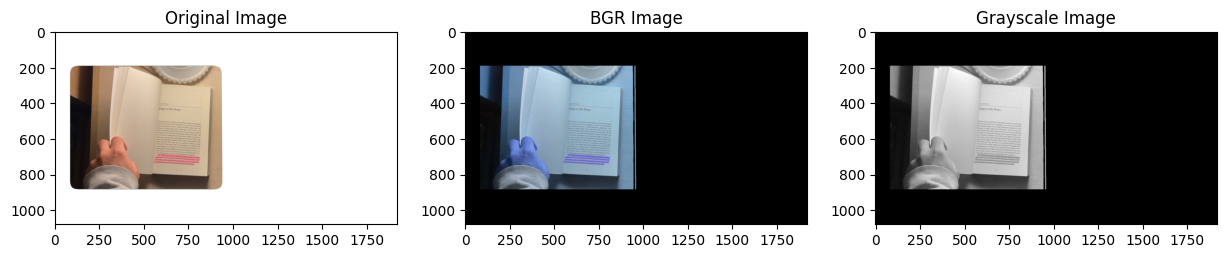

In [8]:
# Display the original and converted images
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image_org)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(image_bgr)
plt.title('BGR Image')

plt.subplot(133)
plt.imshow(image_gray, cmap='gray')  # Display the grayscale image
plt.title('Grayscale Image')

plt.show()

**images performance-comparison**

In [9]:
# Calculate total accuracy for each image
total_accuracy_original = sum([float(result[2]) for result in res_org]) / len(res_org)
total_accuracy_bgr = sum([float(result[2]) for result in res_bgr]) / len(res_bgr)
total_accuracy_gray = sum([float(result[2]) for result in res_gray]) / len(res_gray)

print(f' Original image total accuracy:{round(total_accuracy_original * 100, 3)}%')
print(f' bgr image total accuracy: {round(total_accuracy_bgr * 100, 3)}%')
print(f' Gray image total accuracy: {round(total_accuracy_gray * 100, 3)}%')


 Original image total accuracy:10.403%
 bgr image total accuracy: 13.667%
 Gray image total accuracy: 10.765%


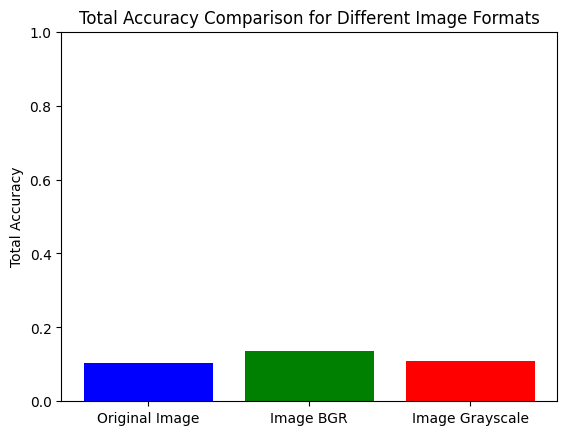

In [10]:
# Plotting the bar chart
labels = ['Original Image', 'Image BGR', 'Image Grayscale']
accuracies = [total_accuracy_original, total_accuracy_bgr, total_accuracy_gray]

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)  # Setting the y-axis limit from 0 to 1 for percentage
plt.ylabel('Total Accuracy')
plt.title('Total Accuracy Comparison for Different Image Formats')
plt.show()

In [11]:
max_accuracy_image = max(total_accuracy_original, total_accuracy_bgr, total_accuracy_gray)
    
if max_accuracy_image == total_accuracy_original:
        ocr_final_txt = ' '.join(result[1] for result in res_org)
elif max_accuracy_image == total_accuracy_bgr:
        ocr_final_txt = ' '.join(result[1] for result in res_bgr)
else:
        ocr_final_txt = ' '.join(result[1] for result in res_gray)

ocr_final_txt

"CHAPTRE € in the Brain Tore deduce luf the Dcucodicx rc(crence (rnoatt hinducht tull have uUno uenplc attana Raht Dol. oincr Fumunuabl chalr aam Ce Ain &nk (n uJont dak Aqad daki I ice Knad Hroct Laht Iran thcr Procnctod onto the Fctua conacrt cht Lnc Cctli in the bc lithe G1c hncrc Iszon Aarta; At uhc DOAechur n8 Mft cuin deue obfnt Loumhour lo Gch unrru #e aRctcnt dutinces Frfeaiv e Uharn to b 41 Idufcrent kaltons} #Feroichinz teri @ Brteche the to my ficht and not (n FY Cala whcce n Mullu' W tt (Ae omc locatlon out (n baiin mut h thc kcatlon ol cury objn{ that Maps Wuct Lureh Mae chumon nnae Cunnu' oton toumna 04a Ena aht eunul J4@ hunliru Ioe]"

# **Text processing**

**Import libraries**

In [12]:
import pandas as pd
import re
import difflib

**Import necessary dataset(s)**

In [13]:
words_en_data = pd.read_csv("D:\Dataset\EnglishWords_dataset\words_pos.csv")

**Data pre-processing**

In [14]:
words_en_data.shape

(370100, 3)

In [15]:
words_en_data.head()

,Unnamed: 0,word,pos_tag
0,0,aa,NN
1,1,aaa,NN
2,2,aah,NN
3,3,aahed,VBN
4,4,aahing,VBG


In [16]:
words_en = words_en_data['word'].to_list()

**clean the text**

In [17]:
ocr_final_txt = re.sub(r'[^A-Za-z\s]', '', ocr_final_txt)
ocr_final_txt = ocr_final_txt.lower()
ocr_final_txt = re.sub(r'\s+', ' ', ocr_final_txt )
ocr_final_txt

'chaptre in the brain tore deduce luf the dcucodicx rccrence rnoatt hinducht tull have uuno uenplc attana raht dol oincr fumunuabl chalr aam ce ain nk n ujont dak aqad daki i ice knad hroct laht iran thcr procnctod onto the fctua conacrt cht lnc cctli in the bc lithe gc hncrc iszon aarta at uhc doaechur n mft cuin deue obfnt loumhour lo gch unrru e arctcnt dutinces frfeaiv e uharn to b idufcrent kaltons feroichinz teri brteche the to my ficht and not n fy cala whcce n mullu w tt ae omc locatlon out n baiin mut h thc kcatlon ol cury objn that maps wuct lureh mae chumon nnae cunnu oton toumna a ena aht eunul j hunliru ioe'

**Example**

In [18]:
# Check if some words are found in this list
trg_word = 'inn'

if trg_word in words_en:
    print(f'"{trg_word}" is in the list!')
else:
    print(f'"{trg_word}" is not in the list.')

"inn" is in the list!


**Words correction**

In [19]:
def correct_sentence(paragraph, words_list):
    corrected_paragraph = []
    
    for word in paragraph.split():
        if word in words_list:
            corrected_paragraph.append(word)
        else:
            closest_match = difflib.get_close_matches(word, words_list, n=1)
            
            if closest_match:
                replacement_word = closest_match[0]
                corrected_paragraph.append(replacement_word)
            else:
                corrected_paragraph.append(word)
                
    corrected_sentence = ' '.join(corrected_paragraph)
    return corrected_sentence

correct_sentence(ocr_final_txt, words_en)

'chaptrel in the brain tore deduce luff the euodic recreance natt induct tulle have usun unplace rattan rat dol incr unusably char aam ce ain nek n unjoint dak vaad dakir i ice knead rocta lat iran thru procinct onto the factual contact ocht ln cacti in the ubc lithe gtc crc miszone asarta at uh doater n mt cutin deuce ont tumour lo ch unrun e arctic duties realive e harn to b dufrenite kations fetichize teri biteche the to my fichat and not n fy scala whence n mull w tyt ae om location out n bain mut h th kalon ol cury obj that maps wut lure mae chupon nae cunny otkon toumnah za vena aht eunuchal j thulir ione'

# **Summarizer API (Chat GPT)**

In [20]:
import requests

url = "https://open-ai21.p.rapidapi.com/conversationgpt35"

payload = {
	"messages": [
		{
			"role": "user",
			"content": correct_sentence(ocr_final_txt, words_en) + "explain this briefly and in a very simple way"
		}
	],
	"web_access": False,
	"system_prompt": "",
	"temperature": 0.9,
	"top_k": 5,
	"top_p": 0.9,
	"max_tokens": 256
}
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "b865073daemshf674c7a23a93a1cp19e6f1jsnf23ac36a8ac7",
	"X-RapidAPI-Host": "open-ai21.p.rapidapi.com"
}

response = requests.post(url, json=payload, headers=headers)

print(response.json())

{'result': 'I understand you\'re asking me to explain something about a plant called "luff" (which is likely referring to "Luffea", also known as rattan) and its use in various applications, including furniture, flooring, and more. However, it seems like there might be some confusion or missing information in your question. Can you please provide more context or clarify what exactly you would like me to explain?', 'status': True, 'server_code': 1}
